In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.dpi'] = 150

In [3]:
prices = pd.concat([pd.read_excel('../data/2010_queens.xls', header=3),
                    pd.read_excel('../data/2010_bronx.xls', header=3),
                    pd.read_excel('../data/2010_brooklyn.xls', header=3),
                    pd.read_excel('../data/2010_manhattan.xls', header=3),
                    pd.read_excel('../data/2010_statenisland.xls', header=3)
                    ])

SAT_scores = pd.read_csv('../data/SAT__College_Board__2010_School_Level_Results_20231216.csv')

high_schools = pd.read_csv('../data/2014_-_2015_DOE_High_School_Directory_20231216.csv')

zip_codes = gpd.read_file('../data/Modified Zip Code Tabulation Areas (MODZCTA)_20231216.geojson')

In [4]:
residential_building_class_categories = [
   '01  ONE FAMILY HOMES                        ',
   '12  CONDOS - WALKUP APARTMENTS              ',
   '02  TWO FAMILY HOMES                        ',
   '03  THREE FAMILY HOMES                      ',
   '04  TAX CLASS 1 CONDOS                      ',
   '07  RENTALS - WALKUP APARTMENTS             ',
   '08  RENTALS - ELEVATOR APARTMENTS           ',
   '09  COOPS - WALKUP APARTMENTS               ',
   '10  COOPS - ELEVATOR APARTMENTS             ',
   '13  CONDOS - ELEVATOR APARTMENTS            ',
   '14  RENTALS - 4-10 UNIT                     ',
   '15  CONDOS - 2-10 UNIT RESIDENTIAL          ',
   '17  CONDOPS                                 ',
   '23  LOFT BUILDINGS                          ',
   '16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
   '11A CONDO-RENTALS                           '
]

In [5]:
prices = prices[prices['BUILDING CLASS CATEGORY'].isin(residential_building_class_categories)]

In [6]:
prices = prices[['ZIP CODE', 'SALE PRICE']]
prices = prices[prices['SALE PRICE']!=0]

In [7]:
mean_prices = prices.groupby('ZIP CODE').agg(['mean', 'count'])

Totally merged data frame:
Goal is for a row to look like this:
ZIP | Mean Housing Price | Mean SAT score | geography

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
scores by school

In [8]:
SAT_scores['School Name'].head()

0    Henry Street School for International Studies 
1              University Neighborhood High School 
2                  East Side Community High School 
3                     SATELLITE ACADEMY FORSYTH ST 
4                                 CMSP HIGH SCHOOL 
Name: School Name, dtype: object

In [9]:
SAT_scores.head()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN


In [10]:
print(list(high_schools.columns))

['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priority10', 'Location 1', 'Comm

In [11]:
high_schools.rename({'dbn': 'DBN', 'postcode': 'ZIP CODE'}, axis=1, inplace=True)


In [12]:
high_schools = high_schools[['DBN', 'ZIP CODE']]

In [13]:
SAT_with_ZIP = SAT_scores.join(high_schools.set_index('DBN'), on='DBN', how='inner')

In [14]:
SAT_with_ZIP.head()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,ZIP CODE
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,10002
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,10002
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,10009
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN,10002
6,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0,10002


In [15]:
SAT_with_ZIP['Critical Reading Mean'] *= SAT_with_ZIP['Number of Test Takers']
SAT_with_ZIP['Mathematics Mean'] *= SAT_with_ZIP['Number of Test Takers']
SAT_with_ZIP['Writing Mean'] *= SAT_with_ZIP['Number of Test Takers']

In [16]:
SAT_with_ZIP = SAT_with_ZIP.dropna()
SAT_with_ZIP = SAT_with_ZIP[['Number of Test Takers', 'Critical Reading Mean',
                            'Mathematics Mean', 'Writing Mean', 'ZIP CODE']]

In [17]:
SAT_with_ZIP.head()

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,ZIP CODE
0,31.0,12121.0,13175.0,11935.0,10002
1,60.0,23640.0,25140.0,23220.0,10002
2,69.0,28842.0,29739.0,27738.0,10009
6,47.0,26696.0,27401.0,26696.0,10002
8,138.0,86940.0,83904.0,86940.0,10002


In [18]:
SAT_with_ZIP = SAT_with_ZIP.groupby('ZIP CODE').sum()

In [19]:
SAT_with_ZIP.head()

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
ZIP CODE,,,,
10002,602.0,281438.0,290069.0,279969.0
10003,341.0,151183.0,153000.0,148738.0
10004,325.0,146195.0,152645.0,146525.0
10006,221.0,97303.0,105687.0,96635.0
10009,69.0,28842.0,29739.0,27738.0


In [20]:
SAT_with_ZIP['Critical Reading Mean'] /= SAT_with_ZIP['Number of Test Takers']
SAT_with_ZIP['Mathematics Mean'] /= SAT_with_ZIP['Number of Test Takers']
SAT_with_ZIP['Writing Mean'] /= SAT_with_ZIP['Number of Test Takers']

In [21]:
SAT_with_ZIP

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
ZIP CODE,,,,
10002,602.0,467.504983,481.842193,465.064784
10003,341.0,443.351906,448.680352,436.181818
10004,325.0,449.830769,469.676923,450.846154
10006,221.0,440.285068,478.221719,437.262443
10009,69.0,418.000000,431.000000,402.000000
...,...,...,...,...
11432,1116.0,429.345878,453.188172,420.964158
11433,99.0,613.000000,650.000000,612.000000
11434,164.0,388.719512,393.548780,380.902439


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
scores by school

In [22]:
merged_df = zip_codes.copy()

In [23]:
merged_df['Mean Price'] = 0
merged_df['Mean Housing Sale Price'] = np.random.randint(7, size=len(merged_df.index))

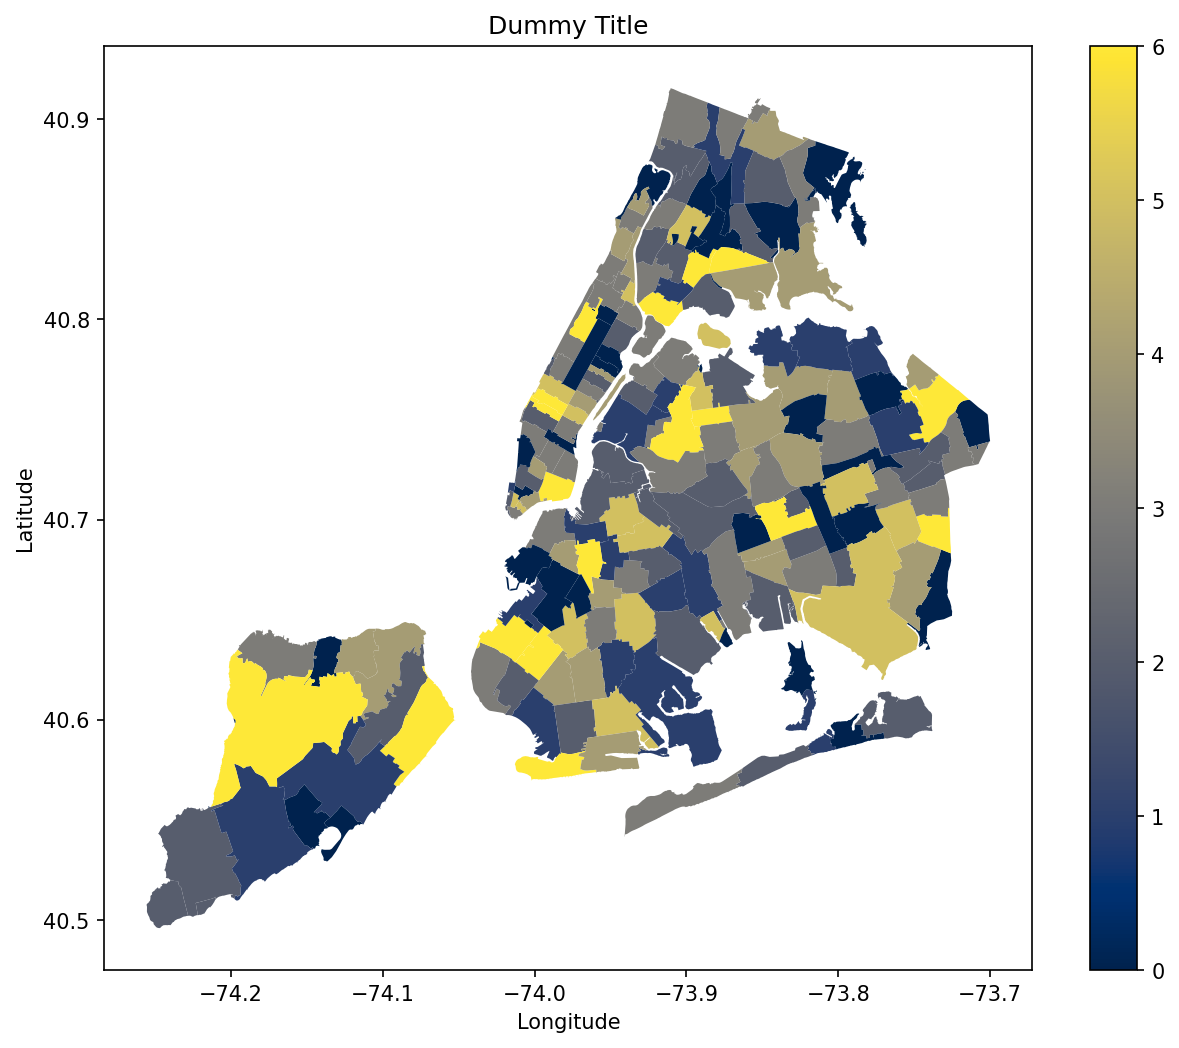

In [25]:
fig, ax = plt.subplots(1, figsize = (10, 8))
ax = merged_df.plot(column='Mean Housing Sale Price', cmap='cividis', ax=ax)
plt.colorbar(
    plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(
        vmin=merged_df['Mean Housing Sale Price'].min(),
        vmax=merged_df['Mean Housing Sale Price'].max())),
        ax = ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dummy Title')
plt.show();